In [1]:
import pandas as pd
import numpy as np
from sklearn import tree

In [2]:
df=pd.read_csv("student_dataset.csv")

In [3]:
X=df.drop('Label', axis=1)
y=df['Label']

In [4]:
df['Label'].value_counts()

Weak        100
Advanced    100
Average     100
Name: Label, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df[['Grades', 'Attendance', 'Study Hours']] = scaler.fit_transform(df[['Grades', 'Attendance', 'Study Hours']])

In [9]:
df

,Grades,Attendance,Study Hours,Label
0,-1.323472,-1.653266,-1.268335,Weak
1,-0.582935,-0.765474,-0.833974,Weak
2,-0.867757,-1.160048,-0.833974,Weak
3,-1.095615,-1.653266,-0.833974,Weak
4,-1.266508,-1.850553,-0.399612,Weak
...,...,...,...,...
295,-0.298114,-0.074969,-0.399612,Average
296,0.385459,0.122318,0.034749,Average
297,0.328495,0.516892,0.469110,Average
298,0.271530,-0.370900,-0.833974,Average


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [16]:
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=2,min_samples_split=10,min_samples_leaf=5,splitter='best',max_features='sqrt',ccp_alpha=0.01)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, Y_train, cv=5)
print("Cross-Validation Accuracy:", scores.mean())
print(scores)

Cross-Validation Accuracy: 0.825
[1.         0.79166667 0.625      0.85416667 0.85416667]


In [17]:
clf=clf.fit(X_train,Y_train)
prediction=clf.predict(X_test)

In [18]:
prediction

array(['Average', 'Average', 'Advanced', 'Weak', 'Average', 'Average',
       'Advanced', 'Advanced', 'Weak', 'Advanced', 'Average', 'Average',
       'Average', 'Average', 'Advanced', 'Average', 'Average', 'Average',
       'Advanced', 'Advanced', 'Weak', 'Advanced', 'Average', 'Average',
       'Advanced', 'Weak', 'Average', 'Average', 'Advanced', 'Average',
       'Weak', 'Advanced', 'Weak', 'Weak', 'Average', 'Advanced',
       'Average', 'Average', 'Weak', 'Weak', 'Weak', 'Weak', 'Average',
       'Average', 'Average', 'Average', 'Average', 'Average', 'Advanced',
       'Average', 'Advanced', 'Advanced', 'Average', 'Weak', 'Average',
       'Average', 'Average', 'Weak', 'Advanced', 'Weak'], dtype=object)

In [19]:
from sklearn.metrics import accuracy_score

In [21]:
print("Train data accuracy:",accuracy_score(y_true = Y_train, y_pred=clf.predict(X_train)))
print("Train data accuracy:",accuracy_score(y_true = Y_test, y_pred=prediction))


Train data accuracy: 0.8458333333333333
Train data accuracy: 0.8666666666666667


In [23]:
from sklearn import metrics
cf=metrics.confusion_matrix(Y_test,prediction)
cf

array([[16,  0,  0],
       [ 0, 22,  0],
       [ 0,  8, 14]], dtype=int64)

In [26]:
print("Precision",metrics.precision_score(Y_test,prediction,average=None))

Precision [1.         0.73333333 1.        ]


In [27]:
print("Recall",metrics.recall_score(Y_test,prediction,average=None))

Recall [1.         1.         0.63636364]


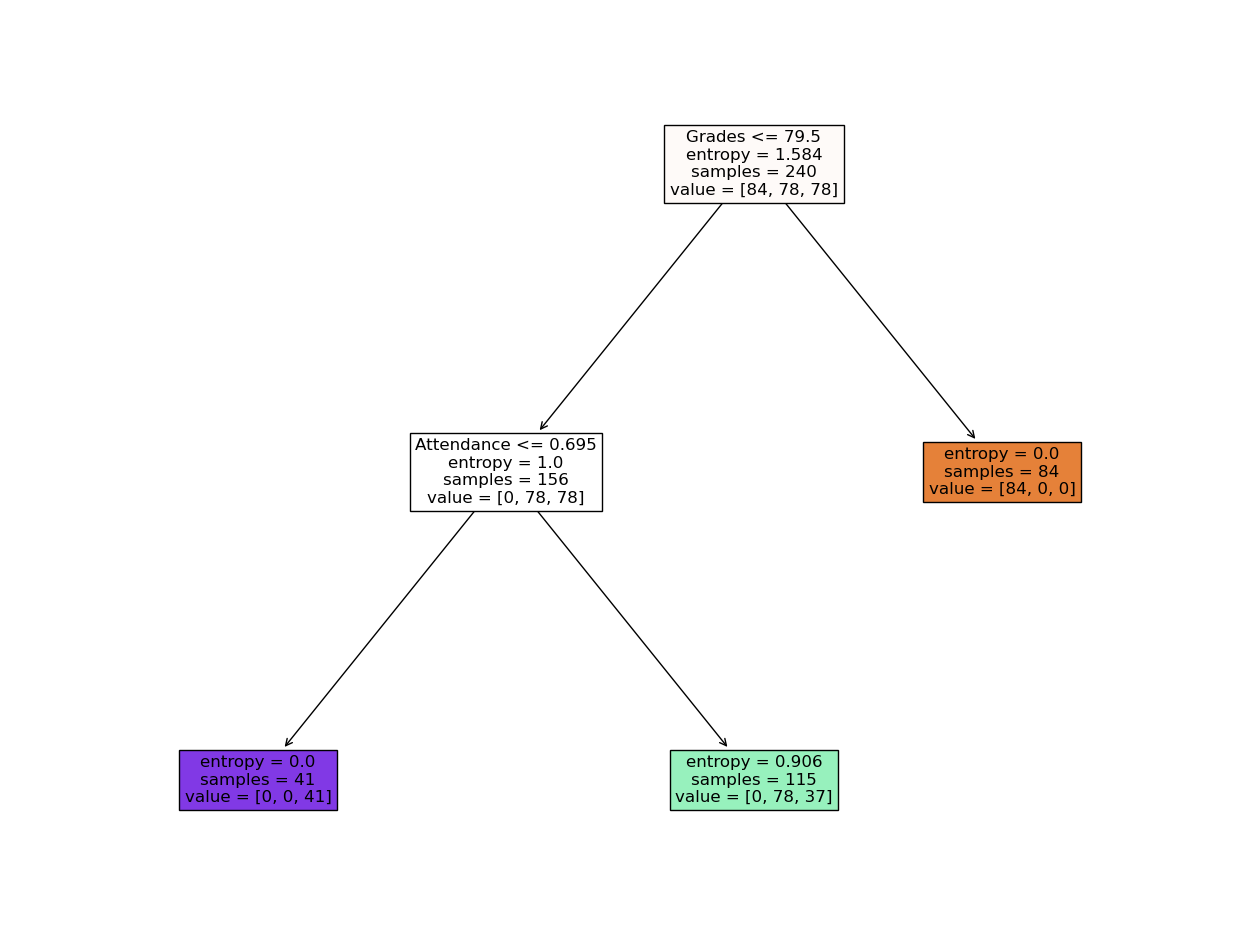

In [33]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a=plot_tree(clf,feature_names=list(X.columns),fontsize=12,filled=True)

In [37]:
feature_importances=clf.feature_importances_

print("Feature importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i} : {importance}")

Feature importances:
Feature 0 : 0.8123622306440965
Feature 1 : 0.18763776935590337
Feature 2 : 0.0
